# 0.Environment Setup (once per runtime)





In [1]:
!git clone https://github.com/GetomG/Thai-Music-Thesis.git

Cloning into 'Thai-Music-Thesis'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 0), reused 10 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 9.07 KiB | 3.02 MiB/s, done.


In [2]:
# Enter project folder
%cd Thai-Music-Thesis

/content/Thai-Music-Thesis


In [1]:
!pip install mido python-rtmidi


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [ ]:
# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import sys
# sys.path.append("/content/Thai-Music-Thesis")
# BASE = "/content/drive/MyDrive/thai_music_data"

In [ ]:
# # Step 0 — Environment setup
# !pip install paddlepaddle==3.2.0 -i https://www.paddlepaddle.org.cn/packages/stable/cpu/
# !pip install "paddleocr[all]"

Looking in indexes: https://www.paddlepaddle.org.cn/packages/stable/cpu/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

# Helper Imports

In [2]:
import random
import re
from mido import Message, MidiFile, MidiTrack, MetaMessage, bpm2tempo

In [4]:
!pwd

/Users/thanakrit/Documents/Thai Music Thesis


In [7]:
import os
import re

base_path = "thai_music_utils"

for filename in sorted(os.listdir(base_path)):
    if filename.endswith(".py"):
        print(f"\n📂 {filename}")

        with open(os.path.join(base_path, filename), "r", encoding="utf-8") as f:
            content = f.read()

        # find all function definitions
        functions = re.findall(r"^def\s+([a-zA-Z0-9_]+)\(", content, re.MULTILINE)

        for func in functions:
            print(f"   - {func}")


📂 constants.py

📂 eda_stats.py
   - extract_symbols
   - pitch_stats
   - stats_to_df

📂 eda_symbolic_normalization.py
   - is_rest
   - normalize_token
   - normalize_bar
   - flatten_song

📂 io_utils.py
   - save_json_bar_per_line

📂 midi_ranad.py
   - generate_ranad_midi

📂 notation_utils.py
   - flatten_song_notation
   - convert_low_notes
   - convert_high_notes
   - normalize_octave_markers
   - notation_to_sequence

📂 octave_inference.py
   - is_thai_note
   - get_fixed_octave
   - guess_octaves_with_constraints
   - add_octaves_respecting_labels

📂 preprocessing.py
   - flatten_song_data
   - remove_all_signs


In [8]:
# ===============================
# 📦 Thai Music Utils – Imports
# ===============================

# ----- Constants -----
from thai_music_utils.constants import (
    THAI_NOTES,
    thai_base,
    octave_offset,
)

# ----- IO Utilities -----
from thai_music_utils.io_utils import (
    save_json_bar_per_line,
)

# ----- Preprocessing -----
from thai_music_utils.preprocessing import (
    flatten_song_data,
    remove_all_signs,
)

# ----- Notation Processing -----
from thai_music_utils.notation_utils import (
    flatten_song_notation,
    convert_low_notes,
    convert_high_notes,
    normalize_octave_markers,
    notation_to_sequence,
)

# ----- Octave Inference -----
from thai_music_utils.octave_inference import (
    is_thai_note,
    get_fixed_octave,
    guess_octaves_with_constraints,
    add_octaves_respecting_labels,
)

# ----- MIDI (Ranad Engine) -----
from thai_music_utils.midi_ranad import (
    generate_ranad_midi,
)


# Creating Directory and Sub-directories (ONCE ONLY)

## For Adding new songs

In [9]:
import pandas as pd
import os, json

# BASE = "/content/drive/MyDrive/thai_music_data"
BASE = "/Users/thanakrit/Documents/Thai Music Thesis/thai_music_data"

# ===================================
# 1) Define songs you want to create
#    (motif, song) pairs
# ===================================
songs_to_create = [
    ("ลาว", "ลองดู")
    # add more...
    # ("motif", "song"),
]


# Create root
os.makedirs(f"{BASE}/songs", exist_ok=True)

# ===================================
# 2) Loop over list instead of CSV
# ===================================
for motif, song in songs_to_create:
    motif = str(motif).strip()
    song  = str(song).strip()

    folder = f"{BASE}/songs/{motif}/{song}"
    print("▶ Creating:", folder)

    os.makedirs(f"{folder}/raw",  exist_ok=True)
    os.makedirs(f"{folder}/json", exist_ok=True)
    os.makedirs(f"{folder}/midi", exist_ok=True)
    os.makedirs(f"{folder}/meta", exist_ok=True)

    # meta.json inside /meta/
    meta_path = f"{folder}/meta/meta.json"
    if not os.path.exists(meta_path):
        meta = {
            "motif": motif,
            "song": song,
            "version": "v1",
            "tempo": None,
            "notes_source": "not_set",
        }
        with open(meta_path, "w", encoding="utf-8") as f:
            json.dump(meta, f, ensure_ascii=False, indent=2)

print("🎉 DONE — Correct motif→song folder structure created.")

▶ Creating: /Users/thanakrit/Documents/Thai Music Thesis/thai_music_data/songs/ลาว/ลองดู
🎉 DONE — Correct motif→song folder structure created.


### Initial Dir Creation

In [ ]:
!mkdir -p $BASE/raw
!mkdir -p $BASE/json
!mkdir -p $BASE/midi
!mkdir -p $BASE/metadata

In [ ]:
!ls $BASE

json  metadata	midi  raw


In [ ]:
!ls -R thai_music_data/raw

thai_music_data/raw:


In [ ]:
import os
import pandas as pd

BASE = "/content/drive/MyDrive/thai_music_data"
CSV_FILE = "/content/thai_songs.csv"   # <- change if needed

# Ensure base folders exist
dirs = ["raw", "json", "midi", "metadata"]
for d in dirs:
    os.makedirs(f"{BASE}/{d}", exist_ok=True)

# Load CSV
songs = pd.read_csv(CSV_FILE, header=None)[0].tolist()

print("Found", len(songs), "songs")

def clean_name(name):
    name = name.strip()
    name = name.replace(" ", "_")
    return name

# Create subfolders
for s in songs:
    if not s or pd.isna(s):
        continue
    folder = clean_name(s)
    print("▶ Creating:", folder)

    for d in dirs:
        os.makedirs(f"{BASE}/{d}/{folder}", exist_ok=True)

print("✅ All directory structures created successfully!")

Found 81 songs
▶ Creating: ปลาทอง
▶ Creating: ลาวดวงเดือน
▶ Creating: ลาวเสี่ยงเทียน_(เถา)
▶ Creating: ลาวคำหอม
▶ Creating: ลาวครวญ
▶ Creating: ลาวสมเด็จ
▶ Creating: ลาวเจริญศรี
▶ Creating: ลาวดำเนินทราย
▶ Creating: ลาวล่องน่าน
▶ Creating: ลาวจ้อย_(สร้อยแสงแดง)
▶ Creating: ลาวกระทบไม้
▶ Creating: พม่าเขว
▶ Creating: พม่ารำขวาน
▶ Creating: พม่ากลองยาว
▶ Creating: พม่าประเทศ
▶ Creating: พม่าแปลง
▶ Creating: พม่าทุงเล
▶ Creating: พม่าบ้าบ่น
▶ Creating: ชเวดากอง_(เถา)
▶ Creating: จีนตอกไม้
▶ Creating: จีนขิมเล็ก
▶ Creating: จีนฮ่อแห่
▶ Creating: จีนไจ้ยอ
▶ Creating: จีนหลวง
▶ Creating: ญี่ปุ่นรำพึง
▶ Creating: ญี่ปุ่นฉะอ้อน
▶ Creating: เขมรไทรโยค_(เถา)
▶ Creating: เขมรพายเรือ_(เถา)
▶ Creating: เขมรโพธิสัตว์_(เถา)
▶ Creating: เขมรลออองค์_(เถา)
▶ Creating: เขมรชมดง
▶ Creating: เขมรเขียว
▶ Creating: เขมรเหลือง
▶ Creating: มอญดูดาว
▶ Creating: มอญท่าอิฐ
▶ Creating: มอญบางขุนพรหม
▶ Creating: มอญชกมวย
▶ Creating: มอญรำดาบ
▶ Creating: มอญตัดแตง
▶ Creating: แขกบรเทศ_(เถา)
▶ Creating: แขกไทร_(เถา)


# 1. OCR a song from image (only for img sources)

In [ ]:
from paddleocr import PaddleOCR
import os, re, json
from glob import glob

# Create one OCR engine for all songs
ocr = PaddleOCR(
    lang='th',
    use_textline_orientation=False,
    use_doc_orientation_classify=False,
    use_doc_unwarping=False
)

Checking connectivity to the model hosters, this may take a while. To bypass this check, set `PADDLE_PDX_DISABLE_MODEL_SOURCE_CHECK` to `True`.
/usr/local/lib/python3.12/dist-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-OCRv5_server_det`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your se

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('th_PP-OCRv5_mobile_rec', None)
Using official model (th_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/th_PP-OCRv5_mobile_rec`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# -----------------------------
# Step 3 — OCR for one song
# -----------------------------

motif = "แขก"
song  = "แขกสาย"

BASE = "/content/drive/MyDrive/thai_music_data/songs"

# The RAW image to OCR (inside its song folder)
image_path = f"{BASE}/{motif}/{song}/raw/{song}_1.png"

# Where to save OCR raw JSON
save_path = f"{BASE}/{motif}/{song}/raw/{song}_ocr_raw.json"

# run OCR
result = ocr.predict(image_path)

In [ ]:

# ---- Step 3.1: Save OCR visual result to motif/song/raw ----
vis_output_path = f"{BASE}/{motif}/{song}/raw"
result[0].save_to_img(vis_output_path)



Connecting to https://paddle-model-ecology.bj.bcebos.com/paddlex/PaddleX3.0/fonts/th.ttf ...
[==================================================] 100.00%


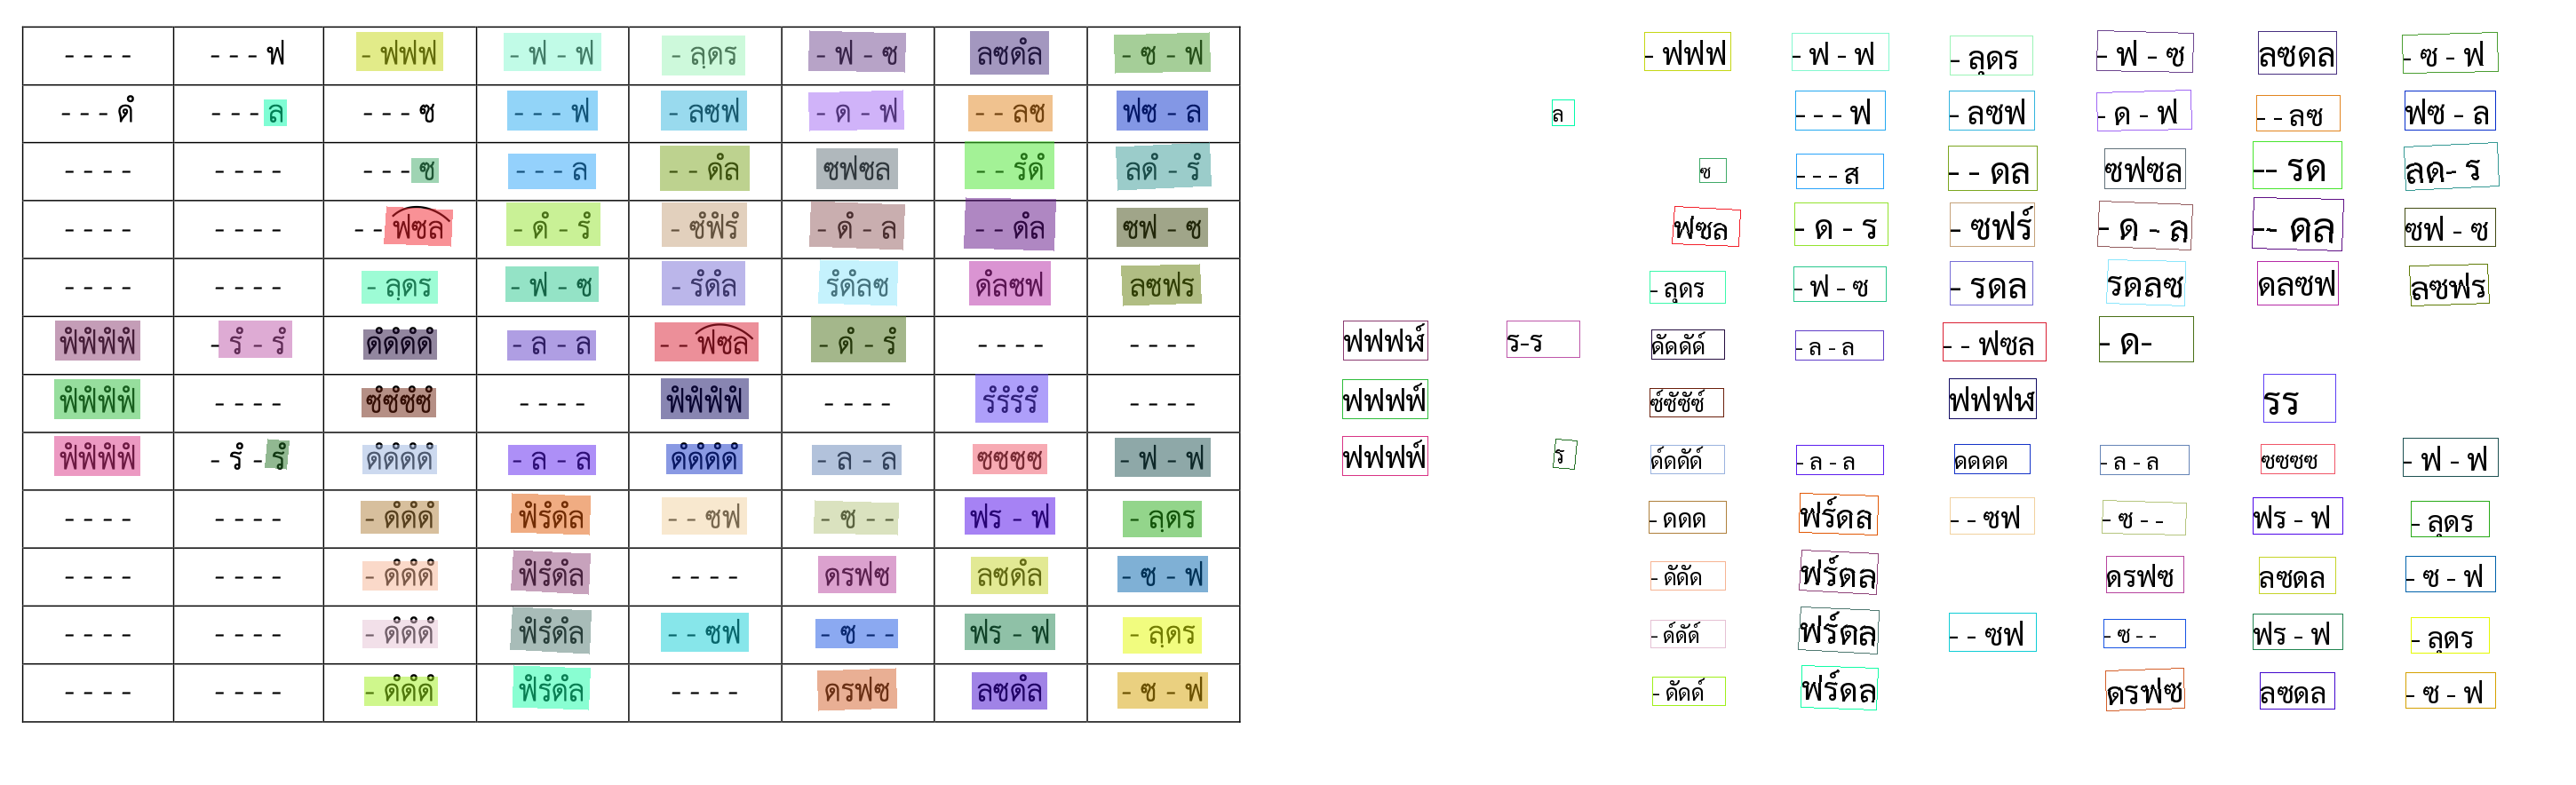

✅ OCR image saved to: /content/drive/MyDrive/thai_music_data/songs/เขมร/เขมรพวง/raw/เขมรพวง_1_ocr_res_img.png


In [ ]:

# Preview the visual OCR result
from IPython.display import Image, display
paddle_vis_file = f"{vis_output_path}/{song}_1_ocr_res_img.png"
display(Image(filename=paddle_vis_file))

print("✅ OCR image saved to:", paddle_vis_file)

In [ ]:
# Step 4 — Extract OCR RAW page-level info
page = result[0]

texts  = page["rec_texts"]
scores = page["rec_scores"]
boxes  = page["rec_boxes"]

print(f"{'Text':<15} {'Conf.':<8} {'x1':<5} {'y1':<5} {'x2':<5} {'y2':<5}")
print("-"*60)

for t, s, (x1, y1, x2, y2) in zip(texts, scores, boxes):
    print(f"{t:<15} {s:<8.3f} {int(x1):<5} {int(y1):<5} {int(x2):<5} {int(y2):<5}")

Text            Conf.    x1    y1    x2    y2   
------------------------------------------------------------
- ฟฟฟ           0.963    401   36    498   79   
- ฟ - ฟ         0.895    567   37    676   79   
- ลุดร          0.936    745   40    838   84   
- ฟ - ซ         0.950    910   34    1019  81   
ลซดล            0.961    1092  35    1180  83   
- ซ - ฟ         0.830    1254  36    1362  82   
- - - ฟ         0.870    571   102   672   146  
- ลซฟ           0.934    744   102   840   146  
- ด - ฟ         0.759    910   101   1017  147  
- - ลซ          0.984    1090  107   1184  147  
ฟซ - ล          0.951    1257  102   1359  146  
ล               0.855    297   112   322   141  
- - ดล          0.915    743   164   843   214  
ซฟซล            1.000    919   167   1010  212  
-- รด           0.771    1086  159   1186  212  
- - - ส         0.806    572   173   670   212  
ลด- ร           0.849    1256  160   1363  214  
ซ               1.000    463   178   493   205  
- ด - ร 

In [ ]:
# ---- Step 4 — Convert OCR result → clean left→right lines ----
page = result[0]

texts  = page["rec_texts"]
scores = page["rec_scores"]
boxes  = page["rec_boxes"]   # [x1, y1, x2, y2]

# Build items list
items = []
for t, s, (x1, y1, x2, y2) in zip(texts, scores, boxes):
    items.append({
        "text": t.strip(),
        "score": float(s),
        "x_center": (x1 + x2) / 2,
        "y_center": (y1 + y2) / 2,
        "x1": float(x1)
    })

# Filter low-confidence + empty
items = [i for i in items if i["score"] >= 0.80 and i["text"]]

# Sort top→bottom
items.sort(key=lambda i: i["y_center"])

# Group into rows
rows = []
threshold = 35
for item in items:
    if not rows:
        rows.append([item])
        continue
    last_row = rows[-1]
    avg_y = sum(i["y_center"] for i in last_row) / len(last_row)
    if abs(item["y_center"] - avg_y) < threshold:
        last_row.append(item)
    else:
        rows.append([item])

# Sort each row left→right
for row in rows:
    row.sort(key=lambda i: i["x1"])

# Keep only Thai note blocks
import re
def is_thai(t):
    return bool(re.search(r"[ก-ฮ]", t)) and not t.isdigit()

clean_rows = [[i["text"] for i in row if is_thai(i["text"])] for row in rows]

# Print nicely
print("\n--- Formatted Lines ---")
for idx, row in enumerate(clean_rows, 1):
    print(f"Line {idx}: {row}")

print("\nDone.")


--- Formatted Lines ---
Line 1: ['แขกกุลิต(แขกหนัง)เถา']
Line 2: ['สองชั่น เที่ยวแรก']
Line 3: ['ทซลท', 'ลทดร', 'มรซม', '--รด', '-ท-ล']
Line 4: ['-รรร', 'มดรม', 'รดทล', '--ซฟ', 'ซล--', 'ซลดล', 'ซฟ-ซ']
Line 5: ['-รดล', 'ดลซฟ', 'มรดร', 'มฟซล', '-ด-ด', 'มรดล', '---ซ', 'ฟลซฟ']
Line 6: ['-ด-ฟ', '-ซ-ล', '-ซด', 'ซลดล', 'ซฟ-ซ']
Line 7: ['กลับต้น']
Line 8: ['สองชั้น เที่ยวหลัง']
Line 9: ['-ซซซ', 'รซ-ร', 'มซ-ม', 'ซมรด', '-ท-ล']
Line 10: ['-รรร', 'ดร-ม', '--รด', '-ล--', 'ซลดล', 'ซฟ-ซ']
Line 11: ['-ลลล', '-ล-ด', '--ลซ', 'ลด--', 'ลซลด', 'ลซฟร']
Line 12: ['-รรร', '-ร-ด', '---ล', '-ด--', 'ซลดล', 'ซฟ-ซ']
Line 13: ['กลับต้น']
Line 14: ['ชั้นเดียวเที่ยวแรก']
Line 15: ['-ร-ร', '--ดม', 'รดทล', '--ซด', '-ท-ล', 'ซลดล', 'ซฟ-ซ']
Line 16: ['ลฟซล', 'ดรดล', '-ซ-ฟ', '-ด-ฟ', '-ซ-ล', 'ซลดล', 'ซฟ-ซ']
Line 17: ['กลับต้น']
Line 18: ['เดียวชั้น เที่ยวหลัง']
Line 19: ['-ร-ม', '--รม', 'รดทล', '--ซด', '-ท-ล', 'ซลดล', 'ซฟ-ซ']
Line 20: ['--ลล', '-ด--', 'ลล-ด', 'ลซฟร', '--รร', '-ด--', 'ซลดล', 'ซฟ-ซ']
Line 21: ['กลับต้น']

D

## Manual fixing (optional)

In [ ]:
# ---- A: Print clean rows without indices (for manual copying) ----
print("\n--- CLEAN ROWS (copy these, edit manually if needed) ---\n")

for row in clean_rows:
    print(row)

print("\n--- END CLEAN ROWS ---")


--- CLEAN ROWS (copy these, edit manually if needed) ---

['แขกกุลิต(แขกหนัง)เถา']
['สองชั่น เที่ยวแรก']
['ทซลท', 'ลทดร', 'มรซม', '--รด', '-ท-ล']
['-รรร', 'มดรม', 'รดทล', '--ซฟ', 'ซล--', 'ซลดล', 'ซฟ-ซ']
['-รดล', 'ดลซฟ', 'มรดร', 'มฟซล', '-ด-ด', 'มรดล', '---ซ', 'ฟลซฟ']
['-ด-ฟ', '-ซ-ล', '-ซด', 'ซลดล', 'ซฟ-ซ']
['กลับต้น']
['สองชั้น เที่ยวหลัง']
['-ซซซ', 'รซ-ร', 'มซ-ม', 'ซมรด', '-ท-ล']
['-รรร', 'ดร-ม', '--รด', '-ล--', 'ซลดล', 'ซฟ-ซ']
['-ลลล', '-ล-ด', '--ลซ', 'ลด--', 'ลซลด', 'ลซฟร']
['-รรร', '-ร-ด', '---ล', '-ด--', 'ซลดล', 'ซฟ-ซ']
['กลับต้น']
['ชั้นเดียวเที่ยวแรก']
['-ร-ร', '--ดม', 'รดทล', '--ซด', '-ท-ล', 'ซลดล', 'ซฟ-ซ']
['ลฟซล', 'ดรดล', '-ซ-ฟ', '-ด-ฟ', '-ซ-ล', 'ซลดล', 'ซฟ-ซ']
['กลับต้น']
['เดียวชั้น เที่ยวหลัง']
['-ร-ม', '--รม', 'รดทล', '--ซด', '-ท-ล', 'ซลดล', 'ซฟ-ซ']
['--ลล', '-ด--', 'ลล-ด', 'ลซฟร', '--รร', '-ด--', 'ซลดล', 'ซฟ-ซ']
['กลับต้น']

--- END CLEAN ROWS ---


In [ ]:
# ---- B: Paste manually corrected rows here ----
edited_rows = [
['แขกกุลิต(แขกหนัง)เถา']
['สองชั่น เที่ยวแรก']
['----','----','ทซลท', 'ลทดร', '----','มรซม', '--รด', '-ท-ล']
['----','-รรร', 'มดรม', 'รดทล', '--ซฟ', 'ซล--', 'ซลดล', 'ซฟ-ซ']
['-รดล', 'ดลซฟ', 'มรดร', 'มฟซล', '-ด-ด', 'มรดล', '---ซ', 'ฟลซฟ']
['----','-ด-ฟ', '----','-ซ-ล', '-ซด','----', 'ซลดล', 'ซฟ-ซ']
['กลับต้น']
['สองชั้น เที่ยวหลัง']
['----','----','-ซซซ', 'รซ-ร','----', 'มซ-ม', 'ซมรด', '-ท-ล']
['----','----','-รรร', 'ดร-ม', '--รด', '-ล--', 'ซลดล', 'ซฟ-ซ']
['----','----','-ลลล', '-ล-ด', '--ลซ', 'ลด--', 'ลซลด', 'ลซฟร']
['----','----','-รรร', '-ร-ด', '---ล', '-ด--', 'ซลดล', 'ซฟ-ซ']
['กลับต้น']
['ชั้นเดียว เที่ยวแรก']
['----','-ร-ร', '--ดม', 'รดทล', '--ซด', '-ท-ล', 'ซลดล', 'ซฟ-ซ']
['----','ลฟซล', 'ดรดล', '-ซ-ฟ', '-ด-ฟ', '-ซ-ล', 'ซลดล', 'ซฟ-ซ']
['กลับต้น']
['ชั้นเดียว เที่ยวหลัง']
['----','-ร-ม', '--รม', 'รดทล', '--ซด', '-ท-ล', 'ซลดล', 'ซฟ-ซ']
['--ลล', '-ด--', 'ลล-ด', 'ลซฟร', '--รร', '-ด--', 'ซลดล', 'ซฟ-ซ']
['กลับต้น']
]

In [ ]:
clean_rows = edited_rows

## JSON building

In [ ]:
# ---------- Step X — Build structured JSON from clean_rows ----------

import re
import json

def is_header_row(row):
    """Header = row contains Thai + less than 3 tokens."""
    if len(row) == 0:
        return False
    has_thai = any(re.search(r"[ก-ฮ]", token) for token in row)
    return has_thai and len(row) < 3


sections = []
current_section = None
title = None

for row in clean_rows:
    if is_header_row(row):
        header_text = " ".join(row).strip()

        # First header = title
        if title is None:
            title = header_text
            continue

        # Start new section
        current_section = {
            "name": header_text,
            "bars": []
        }
        sections.append(current_section)

    else:
        # Must belong to a section
        if current_section is None:
            # If no section yet, create a default one
            current_section = {
                "name": "Section 1",
                "bars": []
            }
            sections.append(current_section)

        current_section["bars"].append(row)

# Build final JSON structure
song_data = {
    "title": title if title else "Untitled",
    "sections": sections
}

# Show result
print(json.dumps(song_data, ensure_ascii=False, indent=2))

{
  "title": "ปลาทองเถา",
  "sections": [
    {
      "name": "สามชั้นท่อน 1",
      "bars": [
        [
          "---ด",
          "-รรร",
          "---ม",
          "-รรร",
          "--รด",
          "ทลซร",
          "--รซ",
          "ลทดร"
        ],
        [
          "-ดรม",
          "รมฟซ",
          "ฟลซฟ",
          "ซฟมร",
          "ซรมฟ",
          "ซฟมร",
          "ซมรด",
          "มรดท"
        ],
        [
          "รททท",
          "รซลท",
          "รมรท",
          "รทลซ",
          "ลทรม",
          "ซรมซ",
          "ฟมรซ",
          "ทลรท"
        ],
        [
          "ซลซม",
          "ซมรด",
          "ทลซล",
          "ทดรม",
          "รมซล",
          "ดลซม",
          "ลซมร",
          "ซมรด"
        ],
        [
          "รซลท",
          "ลทดร",
          "ซมซร",
          "มรดล",
          "ดซซซ",
          "รมซล",
          "รดดด",
          "ซลดร"
        ],
        [
          "มดรม",
          "รมฟซ",
          "ฟลซฟ",
          "ซฟมร",
   

In [ ]:
import json
import os

# ---- Step X — Save cleaned sections JSON to Drive ----
song = "ปลาทอง"   # same name you used earlier
BASE = "/content/drive/MyDrive/thai_music_data"

save_path = f"{BASE}/json/{song}/{song}_clean.json"

# ensure directory exists
os.makedirs(f"{BASE}/json/{song}", exist_ok=True)

song_json = {
    "title": song,
    "sections": sections
}

with open(save_path, "w", encoding="utf-8") as f:
    json.dump(song_json, f, ensure_ascii=False, indent=2)

print("✅ Saved cleaned JSON to:", save_path)

✅ Saved cleaned JSON to: /content/drive/MyDrive/thai_music_data/json/ปลาทอง/ปลาทอง_clean.json


# 2. For manual json

In [22]:
import json
import os

# ====== CONFIG ======
motif = "ลาว"
song  = "ลาวกระทบไม้"

BASE = "/content/drive/MyDrive/thai_music_data/songs"
save_path = f"{BASE}/{motif}/{song}/json/{song}_manual.json"
song_data = {
  "title": "ลาวกระทบไม้",
  "sections": [
    {
      "name": "ท่อนเดียว",
      "bars": [
        ["---ซ","ลทดํรํ","----","ซํมํรํมํ","--รํดํ","รํมํดํรํ","----","---ซ"],
        ["---ล","ซลซซ","-ดํ-ล","ซลซซ","----","---ซ","----","ลดํลดํ"],
        ["-ดํรํมํ","รํดํลดํ","-ดํรํดํ","ทลซล","----","ซลดํม","----","-ซ-ล"],
        ["--ดํล","-ซ-รํ","---มํ","รํมํดํรํ","-ซํ-มํ","รํมํดํรํ","-ดํรํมํ","-รํดํล"],
        ["-มํรํซํ","-มํรํดํ","-ดํรํดํ","ลดํรํล","ซลดํล","-ซซซ","----","----"],
        ["-ดํรํดํ","ลดํรํล","-มํรํดํ","ลดํรํล","-มํรํดํ","รํมํดํรํ","----","-ซ-ล"],
        ["---ดํ","-ล--","-ดํ-ล","-ซ-ม","--ซล","ดํลซม","-ร-ร","---ม"],
        ["---ซ","-ล--","-ซ-รํ","มํรํดํล","----","----","-ม-ม","---ซ"],
        ["---ล","-ดํ--","-ซ-ล","ซลซซ","----","----","-ดํ-ดํ","---ล"],
        ["--ดํซ","-ล--","-ดํ-ล","ดํลซม","--ซล","ดํลซม","-ร-ร","---ม"],
        ["---ซ","-ล--","-ซ-รํ","มํรํดํล","----","----","-มํ-มํ","---รํ"],
        ["---ดํ","-ล--","-ซ-ดํ","-รํ-มํ","---รํ","-มํ-ซํ","---ดํ","-ล--"],
        ["-ซ-ล","---ดํ"]
      ]
    }
  ]
}
# ====== ENSURE DIR EXISTS ======
os.makedirs(f"{BASE}/{motif}/{song}/json", exist_ok=True)

# # ====== SAVE JSON ======
# with open(save_path, "w", encoding="utf-8") as f:
#     json.dump(song_data, f, ensure_ascii=False, indent=2)

# print("✅ Saved:", save_path)

# ====== SAVE JSON (beautiful + one-line bars) ======
save_path = f"{BASE}/{motif}/{song}/json/{song}_full.json"
save_json_bar_per_line(song_data, save_path)

print("✅ Saved:", save_path)

✅ Saved: /content/drive/MyDrive/thai_music_data/songs/ลาว/ลาวกระทบไม้/json/ลาวกระทบไม้_full.json


In [ ]:
# # to remove all sign
# song_data_plain = remove_all_signs(song_data)

In [ ]:
# song_data_plain

{'title': 'แขกขาว เถา',
 'sections': [{'name': 'สามชั้น ท่อน ๑',
   'bars': [['----', '---ร', '-รรร', '-ร-ร', '-ม-ด', '-ร-ม', '-ฟ-ซ', '---ร'],
    ['---ซ', 'ลทดร', '-รรร', '-ร-ร', '-ด-ด', '----ล', '--ดล', 'ซฟ-ซ'],
    ['----', '----', '---ฟ', '--มร', '----', '----', 'มดรม', '-ฟ-ซ'],
    ['----', '----', 'มดรม', '-ฟ-ซ', 'ลซฟม', 'รมฟซ', 'ลซฟซ', 'ลทรล'],
    ['---ซ', 'ลทดร', '----', 'มรซม', '---ร', 'ดมรด', '--รม', 'รดทล'],
    ['-รซล', 'ทดร', '--ดม', 'รดทล', 'ทลซด', '-ท-ล', 'ทลซล', 'ซฟมฟ'],
    ['----', '----', 'ซลซฟ', '-ม-ร', '--รด', 'มร--', 'รดมร', 'ฟมซฟ'],
    ['----', '----', 'ลฟซล', 'ดลซฟ', '--มร', 'มฟ--', 'ซลซฟ', '-ม-ร'],
    ['---ด', '---ซ', '---ด', '---ฟ', '--ซล', 'ซฟมซ', 'ฟมรฟ', 'มรดร'],
    ['---ซ', 'ลทดร', '-รรร', '-ร-ร', '-ด-ด', '----ล', '--ดล', 'ซฟ-ซ'],
    ['----', '----', '---ฟ', '--มร', '----', '----', 'มดรม', '-ฟ-ซ'],
    ['----', '----', 'มดรม', '-ฟ-ซ', 'ลซฟม', 'รมฟซ', 'ลซฟซ', 'ลทรล'],
    ['---ซ', 'ลทดร', '----', 'มรซม', '---ร', 'ดมรด', '--รม', 'รดทล'],
    ['-รซล', 'ทด

# 3. Octave Guessing (Optional)

In [12]:


# Apply the flattening to song_data before passing it to the function
flat_song_data = flatten_song_data(song_data)
song_data_auto = add_octaves_respecting_labels(flat_song_data)

**Debug Below**

In [13]:
from pprint import pprint

pprint(song_data_auto, width=120, sort_dicts=False)

{'title': 'ลาวกระทบไม้',
 'sections': [{'name': 'ท่อนเดียว',
               'bars': [['---ซ', 'ลทดํรํ', '----', 'ซํมํรํมํ', '--รํดํ', 'รํมํดํรํ', '----', '---ซํ'],
                        ['---ลํ', 'ซํลํซํซํ', '-ดํ-ล', 'ซลซซ', '----', '---ซ', '----', 'ลดํลดํ'],
                        ['-ดํรํมํ', 'รํดํลดํ', '-ดํรํดํ', 'ทลซล', '----', 'ซลดํมํ', '----', '-ซํ-ลํ'],
                        ['--ดํล', '-ซ-รํ', '---มํ', 'รํมํดํรํ', '-ซํ-มํ', 'รํมํดํรํ', '-ดํรํมํ', '-รํดํล'],
                        ['-มํรํซํ', '-มํรํดํ', '-ดํรํดํ', 'ลดํรํล', 'ซลดํล', '-ซซซ', '----', '----'],
                        ['-ดํรํดํ', 'ลดํรํลํ', '-มํรํดํ', 'ลดํรํลํ', '-มํรํดํ', 'รํมํดํรํ', '----', '-ซ-ล'],
                        ['---ดํ', '-ล--', '-ดํ-ล', '-ซ-ม', '--ซล', 'ดํลซม', '-ร-ร', '---ม'],
                        ['---ซ', '-ล--', '-ซ-รํ', 'มํรํดํล', '----', '----', '-ม-ม', '---ซ'],
                        ['---ล', '-ดํ--', '-ซ-ล', 'ซลซซ', '----', '----', '-ดํ-ดํ', '---ล'],
                        ['--ดํซ', '-

In [10]:
song_data_auto = {'title': 'ลาวเสี่ยงเทียน (เถา)',
 'sections': [{'name': 'สามชั้น ท่อน 1',
               'bars': [['----', '----', '-ดํ-รํ', '-มํ-ล', '--ดํล', 'ซมซล', '-ดํ-รํ', '-มํ-ซ'],
                        ['----', '----', 'ดํรํดํล', '-ซ-ม', '--ซม', 'รดรม', '-ซ-ล', 'ซลดํซ'],
                        ['----', '----', '-ดํ-รํ', '-มํ-ล', '--ดํล', 'ซมซล', '-ดํ-รํ', '-มํ-ซ'],
                        ['----', '----', 'ดํรํดํล', '-ซ-ม', '--ซม', 'รดรม', '-ซ-ล', 'ซลดํซ'],
                        ['----', '----', 'ดํรํดํล', '-ซ-ม', '----', 'ซลดํรํ', '-มํซํรํ', 'มํรํดํล'],
                        ['----', '----', '-ดรม', '-ซ-ล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ'],
                        ['----', '----', '-ดํ-รํ', '-มํ-ลํ', 'ซํมํ-รํ', '-ดํ-มํ', '--ซํรํ', 'มํรํดํล'],
                        ['----', '----', '-ดรม', '-ซ-ล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ']]},
              {'name': 'สามชั้น ท่อน 2',
               'bars': [['----', '----', '---ดํ', '---ล', '---ซ', '---ม', 'ซมรม', 'ซลดํซ'],
                        ['----', '----', '---ดํ', '---ล', '---ซ', '---ม', 'รมซม', 'รด-ร'],
                        ['----', '----', '---ด', '---ร', '---ม', '---ซ', '-มรม', 'ซลดํซ'],
                        {'นำ': ['ซลซม', 'ซรมซ'], 'ตาม': ['ซลซม', 'ซรมซ']},
                        {'นำ': ['ซลซม', 'รด-ร'], 'ตาม': ['ซลซม', 'รด-ร']},
                        ['---มํ', '---รํ', '---ดํ', '---มํ', 'ซํมํรํดํ', '----', 'ซลดํรํ', 'มํรํดํล'],
                        ['----', '----', '-ดรม', '-ซ-ล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ'],
                        ['----', '----', '-ดํ-รํ', '-มํ-ลํ', 'ซํมํ-รํ', '-ดํ-มํ', '--ซํรํ', 'มํรํดํล'],
                        ['----', '----', '-ดรม', '-ซ-ล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ']]},
              {'name': 'สามชั้น ท่อน 1 รอบเปลี่ยน',
               'bars': [['----', '-ดํ-รํ', '-มํ-ล', '-ดํซล', '----', '-ดํ-รํ', '-มํ-ซ', '-ลมซ'],
                        ['----', '-ม-ซ', 'ดํรํดํล', '-ซ-ม', '----', 'รดรม', 'รมซล', 'ซลดํซ'],
                        ['----', '-ดํ-รํ', '-มํ-ล', '-ดํซล', '----', '-ดํ-รํ', '-มํ-ซ', '-ลมซ'],
                        ['----', '-ม-ซ', 'ดํรํดํล', '-ซ-ม', '----', 'รดรม', 'รมซล', 'ซลดํซ'],
                        ['----', '-ม-ซ', 'ดํรํดํล', '-ซ-ม', '----', 'ซลดํรํ', '-มํซํรํ', 'มํรํดํล'],
                        ['----', 'รมซล', '-ลดํรํ', 'ดํลซล', '-มํรํดํ', 'ลดํรํดํ', 'ลดํรํดํ', 'ลดํซล'],
                        ['----', 'รมซล', '-ลดํรํ', 'ดํลซล', '-มํรํดํ', 'ลดํรํดํ', 'ลดํรํดํ', 'ลดํซล'],
                        ['----', 'รมซล', '-ลดํรํ', 'ดํลซล', '-ดรม', '-ซ-ล', '-ดํรํมํ', '-รํ-ดํ']]},
              {'name': 'สามชั้น ท่อน 2 รอบเปลี่ยน',
               'bars': [{'นำ': ['มํดํรํมํ', 'รํดํลดํ', 'ลซมซ', 'ลดํลซ'], 'ตาม': ['ลดํลซ', 'มซลดํ', 'ลซมซ', 'ลดํลซ']},
                        {'นำ': ['ลดํลซ', 'มซลดํ', 'ลซมซ', 'ดํลซม'], 'ตาม': ['ซรมซ', 'มรมซ', 'มรมซ', '-ด-ร']},
                        {'นำ': ['มํดํรํมํ', 'รํดํลดํ', 'ลซมซ', 'ลดํลซ'], 'ตาม': ['ลดํลซ', 'มซลดํ', 'ลซมซ', 'ลดํลซ']},
                        {'นำ': ['ลดํลซ', 'มซลดํ', 'ลซมซ', 'ดํลซม'], 'ตาม': ['ซรมซ', 'มรมซ', 'มรมซ', '-ด-ร']},
                        ['-มํ-มํ', '---รํ', '---ดํ', '---มํ', 'ซํมํรํดํ', '----', 'ซลดํรํ', 'มํรํดํล'],
                        ['----', '----', '-ดรม', '-ซ-ล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ'],
                        {'นำ': ['-มํ-รํ', '-ดํรํมํ'], 'ตาม': ['-มํ-รํ', '-ดํรํมํ']},
                        {'นำ': ['ซลดํรํ', 'มํรํดํล'], 'ตาม': ['ซลดํรํ', 'มํรํดํล']},
                        {'นำ': ['-ดรม', '-ซ-ล'], 'ตาม': ['-ดรม', '-ซ-ล']},
                        ['--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ']]},
              {'name': 'สองชั้น ท่อน 1',
               'bars': [['----', '----', '-ลลล', 'ซลดํซ', '---ฟ', '-ม--', '-ร-ซ', '---ซ'],
                        ['---ล', 'ซซซซ', '-ลลล', 'ซลดํซ', '---ฟ', '-ม--', '-ร-ซ', '---ซ'],
                        ['---ม', '-รมซ', '--ดํรํ', 'มํรํดํล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ'],
                        ['-มํ-รํ', '-ดํรํมํ', '--ดํรํ', 'มํรํดํล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ'],

                        ['----', '----', '-ลลล', 'ซลดํซ', '---ฟ', '-ม--', '-ร-ซ', '---ซ'],
                        ['---ล', 'ซซซซ', '-ลลล', 'ซลดํซ', '---ฟ', '-ม--', '-ร-ซ', '---ซ'],
                        ['---ม', '-รมซ', '--ดํรํ', 'มํรํดํล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ'],
                        ['-มํ-รํ', '-ดํรํมํ', '--ดํรํ', 'มํรํดํล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ']]},
              {'name': 'สองชั้น ท่อน 2',
               'bars': [{'นำ': ['ซํลํซํมํ', 'ซํรํมํซํ'], 'ตาม': ['ซํลํซํมํ', 'ซํรํมํซํ']},
                        {'นำ': ['ซํลํซํมํ', 'รํดํ-รํ'], 'ตาม': ['ซํลํซํมํ', 'รํดํ-รํ']},
                        {'นำ': ['ซํลํซํมํ', 'ซํรํมํซํ'], 'ตาม': ['ซํลํซํมํ', 'ซํรํมํซํ']},
                        {'นำ': ['ซํลํซํมํ', 'รํดํ-รํ'], 'ตาม': ['ซํลํซํมํ', 'รํดํ-รํ']},
                        ['-มํ-รํ', '-ดํรํมํ', '--ดํรํ', 'มํรํดํล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ'],
                        ['-มํ-รํ', '-ดํรํมํ', '--ดํรํ', 'มํรํดํล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ'],

                        {'นำ': ['ซํลํซํมํ', 'ซํรํมํซํ'], 'ตาม': ['ซํลํซํมํ', 'ซํรํมํซํ']},
                        {'นำ': ['ซํลํซํมํ', 'รํดํ-รํ'], 'ตาม': ['ซํลํซํมํ', 'รํดํ-รํ']},
                        {'นำ': ['ซํลํซํมํ', 'ซํรํมํซํ'], 'ตาม': ['ซํลํซํมํ', 'ซํรํมํซํ']},
                        {'นำ': ['ซํลํซํมํ', 'รํดํ-รํ'], 'ตาม': ['ซํลํซํมํ', 'รํดํ-รํ']},
                        ['-มํ-รํ', '-ดํรํมํ', '--ดํรํ', 'มํรํดํล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ'],
                        ['-มํ-รํ', '-ดํรํมํ', '--ดํรํ', 'มํรํดํล', '--ดํล', 'ซมซล', '-ดํรํมํ', '-รํ-ดํ']]},
              {'name': 'สองชั้น ท่อน 1 รอบเปลี่ยน',
               'bars': [['---ล', 'ดํรํมํล', 'ดํรํมํม', 'ซลมซ', '---ม', 'ซลดํม', 'ซลดํม', 'ซลมซ'],
                        ['---ล', 'ดํรํมํล', 'ดํรํมํม', 'ซลมซ', '---ม', 'ซลดํม', 'ซลดํม', 'ซลมซ'],
                        ['-ดํรํมํ', 'รํดํซํมํ', 'รํดํรํมํ', 'รํดํซล', '-ดํซล', '-ดํซล', '-ดํรํมํ', '-รํ-ดํ'],
                        ['-ดํรํมํ', 'รํดํซํมํ', 'รํดํรํมํ', 'รํดํซล', '-ดํซล', '-ดํซล', '-ดํรํมํ', '-รํ-ดํ']]},
              {'name': 'สองชั้น ท่อน 2 รอบเปลี่ยน',
               'bars': [{'นำ': ['มํดํรํมํ', 'รํดํลซ'], 'ตาม': ['ดํซลดํ', 'รํดํลซ']},
                        {'นำ': ['ลดํลซ', 'มลซม'], 'ตาม': ['ซรมซ', 'มรดร']},
                        {'นำ': ['มํดํรํมํ', 'รํดํลซ'], 'ตาม': ['ดํซลดํ', 'รํดํลซ']},
                        {'นำ': ['ลดํลซ', 'มลซม'], 'ตาม': ['ซรมซ', 'มรดร']},
                        ['-ดํรํมํ', 'รํดํซํมํ', 'รํดํรํมํ', 'รํดํซล', '-ดํซล', '-ดํซล', '-ดํรํมํ', '-รํ-ดํ'],
                        ['-ดํรํมํ', 'รํดํซํมํ', 'รํดํรํมํ', 'รํดํซล', '-ดํซล', '-ดํซล', '-ดํรํมํ', '-รํ-ดํ']]},
              {'name': 'ชั้นเดียว ท่อน 1',
               'bars': [['--ดํล', '--ดํซ', '-มซล', 'ซลดํซ', '--ดํล', '--ดํซ', '-มซล', 'ซลดํซ'],
                        ['ซลซม', 'ซมรด', '-ลฺ-ด', '----', 'ซลซม', 'ซมรด', '-ลฺ-ด', '----'],
                        ['--ดํล', '--ดํซ', '-มซล', 'ซลดํซ', '--ดํล', '--ดํซ', '-มซล', 'ซลดํซ'],
                        ['ซลซม', 'ซมรด', '-ลฺ-ด', '----', 'ซลซม', 'ซมรด', '-ลฺ-ด', '----']]},
              {'name': 'ชั้นเดียว ท่อน 2',
               'bars': [['--ดํล', 'ดํลดํซ', '--ซม', 'ซมซร', '--ดํล', 'ดํลดํซํ', '--ซม', 'ซมซร'],
                        ['ซลซม', 'ซมรด', '-ลฺ-ด', '----', 'ซลซม', 'ซมรด', '-ลฺ-ด', '----'],
                        ['--ดํล', 'ดํลดํซํ', '--ซม', 'ซมซร', '--ดํล', 'ดํลดํซํ', '--ซม', 'ซมซร'],
                        ['ซลซม', 'ซมรด', '-ลฺ-ด', '----', 'ซลซม', 'ซมรด', '-ลฺ-ด', '----']]},
              {'name': 'ลูกหมด',
               'bars': [['--ดํล', '--ดํซ', '-มซล', 'ซลดํซ', '-มซล', 'ดํซ-ล', '-ลดํรํ', 'มํดํ-รํ'],
                        ['-มํดํรํ', '-มํดํรํ', '-มํรํดํ', 'รํมํดํรํ', '-ลดํล', 'ซลดํม', 'ซมรด', 'รมดร'],
                        ['-รมร', 'ดรมซ', 'มซลดํ', 'ลดํซล', '-มํรํดํ', 'ลดํรํล', '-มํรํดํ', 'รํมํดํรํ']]}]}


In [15]:
BASE = "/Users/thanakrit/Documents/Thai Music Thesis/thai_music_data/songs"

In [16]:
motif = "ลาว"
song  = "ลาวกระทบไม้"

# /Users/thanakrit/Documents/Thai Music Thesis/thai_music_data/songs/ลาว/ลาวกระทบไม้/json

## OVERRIDE ##
# # ====== SAVE JSON COLAB (beautiful + one-line bars) ======
# save_path = f"{BASE}/{motif}/{song}/json/{song}_full_local.json"
# save_json_bar_per_line(song_data_auto, save_path)

# ====== SAVE JSON LOCAL (beautiful + one-line bars) ======
save_path = f"{BASE}/{motif}/{song}/json/{song}_full_local.json"
save_json_bar_per_line(song_data_auto, save_path)


print("✅ Saved:", save_path)

✅ Saved: /Users/thanakrit/Documents/Thai Music Thesis/thai_music_data/songs/ลาว/ลาวกระทบไม้/json/ลาวกระทบไม้_full_local.json


# 4. MIDI Generation

In [19]:
# -----------------------------
# JSON → MIDI (for Thai classical notation)
# -----------------------------
import json
import re, random
from mido import Message, MidiFile, MidiTrack, MetaMessage, bpm2tempo

# -----------------------------
# 1) Load JSON from Drive
# motif = "พม่า"
# song  = "พม่าแปลง"


# BASE = "/content/drive/MyDrive/thai_music_data/songs"

json_path = f"{BASE}/{motif}/{song}/json/{song}_full_local.json"

with open(json_path, "r", encoding="utf-8") as f:
    song_data = json.load(f)

print("Loaded:", json_path)

Loaded: /Users/thanakrit/Documents/Thai Music Thesis/thai_music_data/songs/ลาว/ลาวกระทบไม้/json/ลาวกระทบไม้_full_local.json


In [21]:
from thai_music_utils.notation_utils import (
    flatten_song_notation,
    normalize_octave_markers,
    notation_to_sequence
)

from thai_music_utils.midi_ranad import generate_ranad_midi
import shutil
import os


# 1️⃣ Flatten JSON → notation tokens
notation = flatten_song_notation(song_data)

# 2️⃣ Merge into string
sequence = notation_to_sequence(notation)

# 3️⃣ Normalize octave markers
sequence = normalize_octave_markers(sequence)

# 4️⃣ Define output path (Drive)
drive_midi_path = f"{BASE}/{motif}/{song}/midi/{song}_v1.mid"

# 5️⃣ Generate + save ONCE
generate_ranad_midi(
    sequence=sequence,
    output_path=drive_midi_path,
    bpm=150,
    global_transpose=12,
    play_in_octave_pairs=True,
    enable_roll=True
)

# # 6️⃣ Copy to Colab local (no re-render)
# colab_copy_path = f"/content/{song}_full.mid"
# shutil.copy(drive_midi_path, colab_copy_path)

# print("✅ Saved to Drive:", drive_midi_path)

# ============================================================
# 6️⃣ Copy to LOCAL (for local development, not Colab)
# ============================================================

# Local temp directory for quick playback/preview
local_temp_path = f"/tmp/{song}_preview.mid"
os.makedirs(os.path.dirname(local_temp_path), exist_ok=True)
shutil.copy(drive_midi_path, local_temp_path)
print("📥 Copied to local temp:", local_temp_path)

# Also save to song folder's midi directory locally

local_midi_path = f"{BASE}/{motif}/{song}/midi/{song}_local.mid"
shutil.copy(drive_midi_path, local_midi_path)
print("💾 Saved to local song folder:", local_midi_path)

print("\n✨ MIDI generation complete!")


📥 Copied to local temp: /tmp/ลาวกระทบไม้_preview.mid
💾 Saved to local song folder: /Users/thanakrit/Documents/Thai Music Thesis/thai_music_data/songs/ลาว/ลาวกระทบไม้/midi/ลาวกระทบไม้_local.mid

✨ MIDI generation complete!
